In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X_feature = np.random.rand(1000 , 1 )
Y_target = 2 + 3 * X_feature + np.random.randn(1000 , 1)

In [3]:
X_feature = np.hstack((X_feature , np.ones((1000,1))))

In [4]:
class LinearRegModel:
  def __init__(self , lr = 0.1 , epoch = 1000 ):
    self.lr = lr
    self.epoch = epoch
    self.w = np.random.rand(2,1)
    self.ls = []

  def loss(self , y_pred , target):
    return np.mean(np.square(y_pred - target))

  def pred (self  ,  inp):
    return np.matmul( inp , self.w )

  def grad ( self , y_pred , input , target ):
    return np.mean((y_pred - target) * input )

  def grad_des ( self , input , target ):
    for i in range(self.epoch):
      y_pred = self.pred( input  )
      los =  self.loss(y_pred , target)
      self.ls.append(los)
      grad = self.grad(y_pred , input , target)
      self.w = self.w - self.lr * grad
    return self.w

In [5]:
learning_rate = [0.001 , 0.01 , 0.1 , 0.25 , 0.5 ]
iter = 100

The learning rate is 0.001 and final loss is = 5.941158467220501
The learning rate is 0.01 and final loss is = 1.9137209490402984
The learning rate is 0.1 and final loss is = 1.104804431788521
The learning rate is 0.25 and final loss is = 1.0473177937345672
The learning rate is 0.5 and final loss is = 1.019108303967187


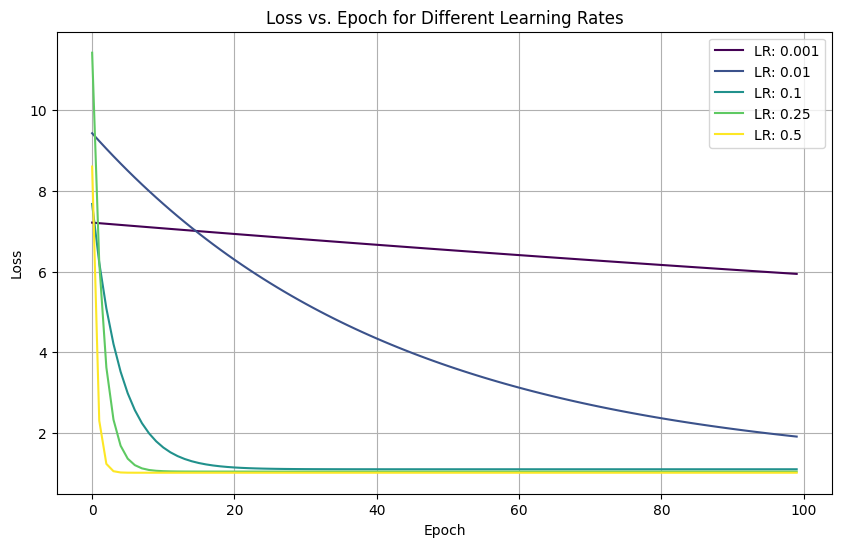

In [6]:
all_loss_histories = []

for l in learning_rate:
  model = LinearRegModel(l, epoch=iter) # Use 'iter' as epoch
  model.grad_des(X_feature, Y_target)
  print(f"The learning rate is {l} and final loss is = {model.ls[-1]}")
  all_loss_histories.append((l, model.ls))

# Plotting all loss histories
plt.figure(figsize=(10, 6))
num_learning_rates = len(learning_rate)
colors = plt.cm.viridis(np.linspace(0, 1, num_learning_rates)) # Using viridis colormap for distinct colors

for i, (lr, losses) in enumerate(all_loss_histories):
    plt.plot(range(iter), losses, label=f'LR: {lr}', color=colors[i]) # Assign color from colormap

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()